<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64"/>

# <span style="color:#336699">Brazil Data Cube Platform: Earth Observation data cubes and satellite image time series analysis</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 90%;">
    Karine R. Ferreira, Gilberto R. Queiroz, Abner E. Anjos, Baggio L. C. Silva, Fabiana Ziotti, Felipe, C. Souza, Felipe Menino, Gabriel Sansigolo, Raphael W. Costa, Rennan F. B. Marujo
    <br/><br/>
    Divisão de Observação da Terra e Geoinformática, Instituto Nacional de Pesquisas Espaciais (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Ultíma Atualização: 11 de Abril de 2025
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Resumo.</b> Este Jupyter Notebook é parte do material da capacitação "Earth Observation Data Cubes and Time Series Analysis of Images". Nos últimos anos, o padrão aberto SpatioTemporal Asset Catalog (STAC) tem sido utilizado por diversas iniciativas para indexar os grandes acervos de imagens de sensoriamento remoto. Desta forma, as coleções disponíveis nesses acervos podem ser consultadas e acessadas através de uma interface de programação de aplicações (API). Este Jupyter Notebook apresenta uma visão geral de como utilizar este serviço na linguagem Python para descoberta e acesso aos produtos de dados de sensoriamento remoto disponíveis na <em>Plataforma Brazil Data Cube</em>. Nele também é demonstrado como utilizar o serviço Web Time Series Service (WTSS) para extrair séries temporais, o serviço Web Land Trajectory Service (WLTS) para extrair tragetórias de uso e cobertura da Terra, o Serviço Web Crop Phenology Metrics Service (WCPMS) para extrair métricas fenológicas e o uso dessas tecnologias em aplicações.
</div>

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64"/>

# Brazil Data Cube
<hr style="border:1px solid #0077b9;">

O Brazil Data Cube (BDC) é um projeto de pesquisa, desenvolvimento e inovação tecnológica do Instituto Nacional de Pesquisas Espaciais (INPE). Nesse projeto foram preparados grandes volumes de imagens de sensoriamento remoto de média resolução para todo o território nacional além do desenvolvimento de uma plataforma computacional para processar e analisar esses conjuntos de dados utilizando inteligência artificial, aprendizado de máquina e análise de séries temporais de imagens.

Os conjuntos de dados produzidos no projeto BDC incluem coleções de dados prontos para análise (ARD, na sigla em inglês), cubos de dados multidimensionais e mosaicos gerados a partir de imagens dos satélites AMAZONIA-1, CBERS-4/4A, Sentinel-2, Landsat, TERRA e AQUA. A plataforma computacional é composta por serviços web, aplicativos de software e ambientes de computação iterativa. Utilizando inteligência artificial, aprendizado de máquina e análise de séries temporais de imagens, mapas de uso e cobertura da terra estão sendo produzidos a partir desses datacubes.

Nesse contexto, os cubos de dados de Observação da Terra (EO, na sigla em inglês) representam uma inovação poderosa no campo, oferecendo uma maneira estruturada e multidimensional de armazenar, gerenciar e analisar grandes volumes de dados de EO. Os datacubes de EO organizam os dados em uma grade tridimensional, com dimensões espaciais (latitude e longitude) e uma dimensão temporal (tempo), permitindo acesso eficiente e sistemático a dados de séries temporais em várias localidades.

O volume de big data apresenta tanto oportunidades quanto desafios. Por um lado, a disponibilidade de grandes conjuntos de dados permite análises mais precisas e detalhadas. Por outro lado, gerenciar, processar e analisar esses grandes volumes de dados requer técnicas computacionais avançadas e recursos significativos.

O sensoriamento remoto tradicionalmente dependia de abordagens de cena única para classificação. No entanto, essa prática evoluiu significativamente nos últimos anos devido à alta disponibilidade de dados de vários satélites e sensores e às capacidades de processamento dos computadores modernos.

O uso de séries temporais no sensoriamento remoto revolucionou o campo, proporcionando uma perspectiva dinâmica e abrangente sobre mudanças ambientais e padrões de uso da terra. A análise de séries temporais envolve o exame de intervalos de tempo sucessivos, permitindo a detecção de tendências, variações sazonais e anomalias ao longo do tempo.

Para mais informações sobre o Brazil Data Cube, consulte:

<a href="https://data.inpe.br/bdc/web/en/home-page-2/">BDC Website</a>

<a href="https://github.com/brazil-data-cube">BDC GitHub</a>

<a href="https://brazil-data-cube.github.io/">BDC GitHub IO</a>

<a href="https://data.inpe.br/stac/browser/?.language=en">INPE STAC Browser</a>

No exercício desse notebook vamos fazer o seguinte fluxo de atividades:

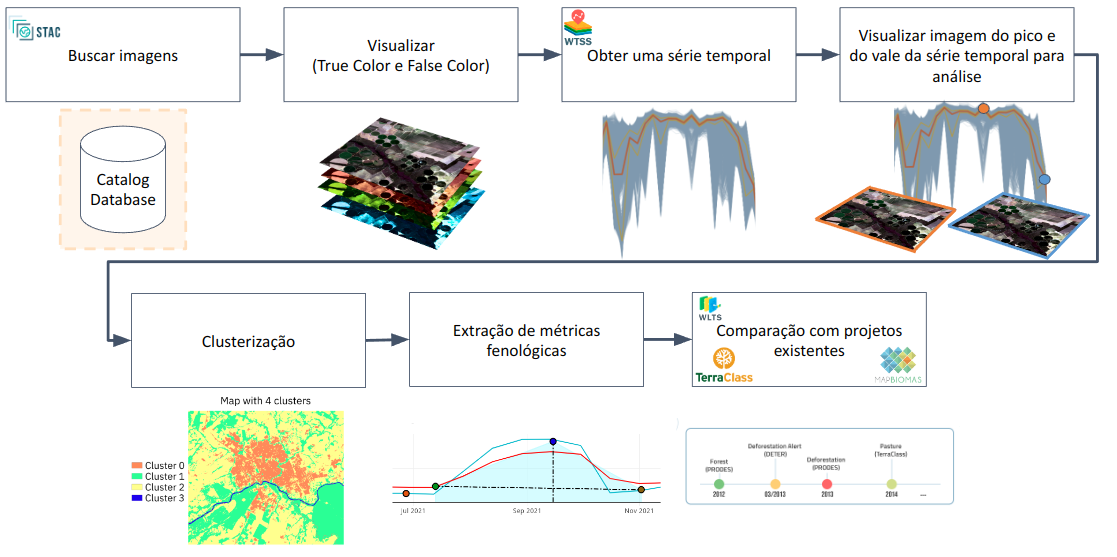

Para simplificar nossa visualização ao longo do Notebook vamos ve-lo assim:

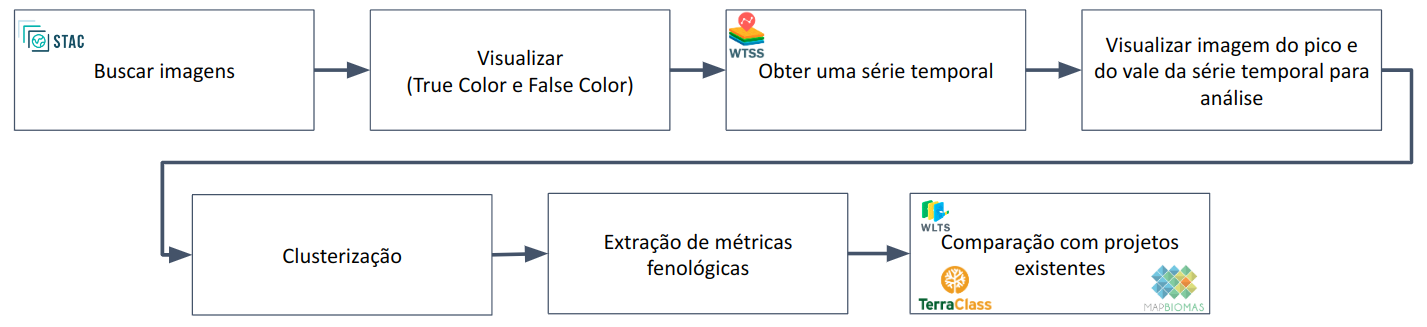

Preparação de versões
<hr style="border:1px solid #0077b9;">

Nesse notebook utilizaremos algumas versões específicas de pacotes do BDC.

Para isso você deve instalar os pacotes abaixo utilizando o comando `pip`

Caso você ja tenha executado o comando `import` em algum desses pacotes será necessário clicar na aba `Kernel` do Geolab e `Restart Kernel` para que seja possíovel ser carregada a versão instalada.

In [ ]:
!pip install wtss==2.0.0a3

In [ ]:
!pip install wcpms==0.2.0

In [ ]:
!pip install git+https://github.com/brazil-data-cube/wlts.py@v1.2.1

# Abrindo um shapefile e definindo uma area de estudo
<hr style="border:1px solid #0077b9;">

Neste exemplo vamos usar o arquivo `LEM_dataset_small.shp`. Para isso, será usada a biblioteca GeoPandas. Vamos abrir esse arquivo e extrair a informação de geometria.

In [ ]:
import folium
import geopandas as gpd

Podemos abrir um .shp diretamente ou um .zip contendo um .shp da seguinte forma:

In [ ]:
# zipfile = "LEM_dataset_small.zip"
# samples_df = gpd.read_file(zipfile)
# samples_df.head()

Ou podemos abrir um .shp armazenado online da seguinte forma:

In [ ]:
import io
import os
import requests
import tempfile
import zipfile

zipfile_url = "https://github.com/brazil-data-cube/code-gallery/raw/master/jupyter/Data/2025-sbsr/LEM_dataset_small.zip"
response = requests.get(zipfile_url)
with tempfile.TemporaryDirectory() as tmpdir:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall(tmpdir)

        shp_file = [f for f in os.listdir(tmpdir) if f.endswith('.shp')][0]
        shp_path = os.path.join(tmpdir, shp_file)

        my_shp = gpd.read_file(shp_path)

        geometry_union = my_shp.geometry.unary_union
        bbox = geometry_union.bounds
        centroide = geometry_union.centroid
my_shp

Vamos vizualizar onde encontra-se essa área:

In [ ]:
f = folium.Figure(width=1000, height=300)

centroide = my_shp.geometry.unary_union.centroid
m = folium.Map(location=[centroide.y, centroide.x],
               zoom_start=11,
               tiles="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}",
               attr="Esri World Imagery"
).add_to(f)

folium.GeoJson(my_shp).add_to(m)

m

Podemos inclusive visualizar o bbox dessa area:

In [ ]:
folium.Rectangle(
    bounds=[[bbox[1], bbox[0]], [bbox[3], bbox[2]]],  # [[min_lat, min_lon], [max_lat, max_lon]]
    color="#ff0000",
    fill=True,
    fill_opacity=0,
    tooltip=f"BBox: {bbox}"
).add_to(m)

m

# 1. Buscar imagens

---


Vamos começar buscando as imagens que utilizaremos.

Para isso utilizaremos o serviço SpatioTemporal Asset Catalog (STAC) por meio de um client na linguagem de programação Python.

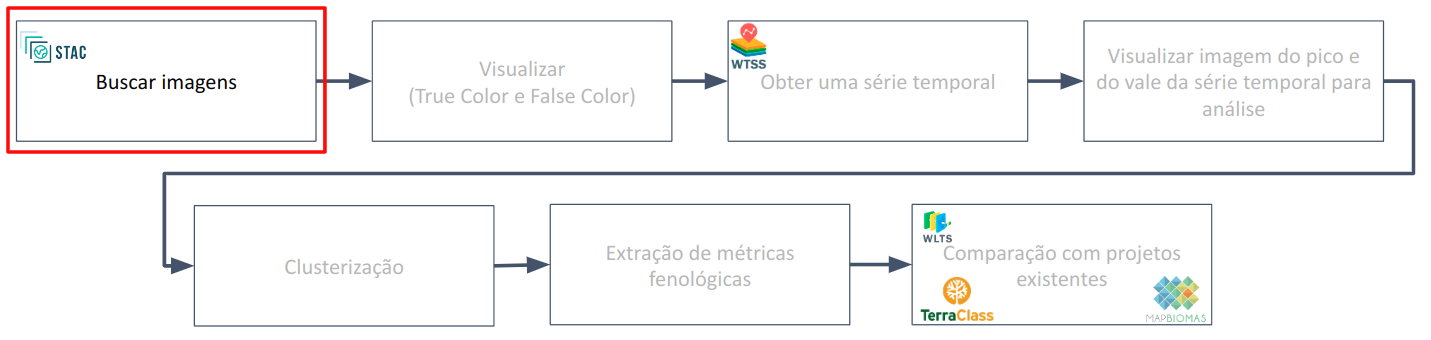

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac.png?raw=true" align="right" width="66"/>

## Catálogo de Coleções de Imagem de Sensoriamento Remoto: **S**patio**T**emporal **A**sset **C**atalog (STAC)
<hr style="border:1px solid #0077b9;">

Boa parte dos produtos de imagem do [Brazil Data Cube](https://data.inpe.br/bdc/web/) são disponibilizados de maneira aberta na forma de arquivos otimizados para *cloud*, o denominado formato **C**loud **O**ptimized **G**eoTIFF (**COG**). Este formato permite que as aplicações possam utilizar as imagens através da Web com o melhor compromisso possível, incluindo o uso de pirâmide de multi-resolução para aplicações de visualização ou até mesmo a recuperação parcial de porções de uma imagem.


Esses produtos de dados podem ser consultados utilizando uma interface de programação de aplicações baseada no padrão aberto [**S**patio**T**emporal **A**sset **C**atalog (STAC)](https://stacspec.org/). Esta especificação, criada por organizações e especialistas do setor geoespacial, é baseada nos conceitos apresentados no diagrama abaixo:

<center>
<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-concept.png" width="480" />
<br/>
Modelo de funcionamento do STAC.
</center>

Em que:

- **Catalog**: É um tipo de objeto que fornece uma estrutura para vincular vários itens ou coleções STAC juntos ou mesmo outros catálogos. Na figura acima, o catálogo é composto de três coleções: Landsat/OLI, CBERS4/WFI e Sentinel-2/MSI.

- **Collection:** É uma especialização do catálogo que permite incluir informações adicionais sobre uma determinada coleção espaço-temporal. Uma coleção pode conter informações como o conjunto de bandas espectrais disponíveis das imagens, a extensão geográfica ou área de cobertura das imagens, o período de tempo que compreende a coleção, entre outras informações. Em geral, através da coleção chegamos aos itens dessa coleção.

- **Item**: Corresponde à unidade atômica de metadados, fornecendo *links* para os *assets* associados. Um *Item* é descrito através da notação GeoJSON, como uma feição (*feature*) contendo atributos específicos como a coleção a que ele pertence, propriedades temporais, *links* para os *assets* e coleções ou catálogos associados. Na figura acima, um `Item` equivale a uma cena obtida por um satélite em um determinado instante de tempo.

- **Asset**: Um *asset* é qualquer recurso geoespacial, como um arquivo de imagem ou arquivo vetorial, contendo informações sobre a supefície da Terra, em um determinado espaço e tempo.


A especificação conceitual do STAC permite dois tipos de implementações:

- **STAC estático:** Baseada em um conjunto de documentos JSON ligados que podem ser facilmente navegados. Ex: [CBERS na AWS](https://cbers-stac-1-0-0.s3.amazonaws.com/CBERS4/catalog.json).

- **STAC dinâmico:** Baseada em uma API RESTful, de modo que a navegação é realizada através de uma API de serviço web que permite realizar consultas utilizando uma linguagem padrão para acessar subconjuntos do catálogo. Ex: [BDC-STAC](https://data.inpe.br/bdc/stac/v1).


<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Nota:</b> Como parte do aperfeiçoamento dos produtos e serviços disponibilizados pelo INPE à sociedade, encontra-se em desenvolvimento o novo portal <a href="https://data.inpe.br/">https://data.inpe.br/</a>, que faz parte da modernização da infraestrutura de serviços para acesso às imagens de satélites do acervo do instituto. Esse portal foi criado com o intuito de facilitar a pesquisa e obtenção das imagens disponibilizadas gratuitamente. Esse novo serviço tem como base as tecnologias desenvolvidas no projeto Brazil Data Cube, e está ancorado dentro do Programa Base de Informações Georreferenciadas (BIG) do INPE. Para navegar pelas coleções disponibilizadas no serviço STAC do INPE, utilize a instância do [STAC Browser](https://data.inpe.br/stac/browser/).
</div>

Cliente STAC no Python
<hr style="border:1px solid #0077b9;">

Para demonstrar o acesso aos produtos de dados do Brazil Data Cube, iremos utilizar uma bibloteca de software livre para Python denominada [PySTAC Client](https://pystac-client.readthedocs.io/en/stable/) (`pystac-client`).

Para instalar essa biblioteca no ambiente Jupyter, pode ser utilizado o comando `pip install`:

In [ ]:
# !pip install pystac-client

In [ ]:
# !pip install shapely tqdm

Uma vez instalada a biblioteca `pystac-client`, podemos carregar suas funcionalidades através do comando `import`, como mostrado abaixo:

In [ ]:
import pystac_client

Em geral, uma biblioteca do ecossistema Python possui uma constante especial para informar a versão da biblioteca carregada. Abaixo, apresentamos a versão carregada  da biblioteca `pystac-client`:

In [ ]:
pystac_client.__version__

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-catalog.png?raw=true" align="right" width="300"/>

## Descobrindo as Coleções em um Catálogo STAC
<hr style="border:1px solid #0077b9;">

O endereço do serviço STAC do BDC é https://data.inpe.br/bdc/stac/v1/. Para descobir as coleções disponíveis no catálogo central desse serviço,
podemos utilizar a classe `Client` do pacote `pystac_client`.

Essa classe possui um método denominado `open` que permite informar a URL do serviço STAC a ser utilizado. Assim que chamado, esse método realiza uma consulta ao serviço STAC, recuperando as informações do catálogo central.

In [ ]:
catalogo = pystac_client.Client.open('https://data.inpe.br/bdc/stac/v1/')
catalogo

O objeto retornado possui atributos como `id`, `title` e `description`:

In [ ]:
catalogo.id

In [ ]:
catalogo.title

In [ ]:
catalogo.description

Um catálogo também contém propriedades como:

- `links`: Lista de endereços para todas as coleções disponíveis no catálogo.

- `conformsTo`: Lista das capacidades do serviço. No caso acima, a classe de conformidade `item-search` especifica que o serviço do BDC é capaz de realizar a busca de itens percorrendo todas as coleções.

O método `get_collections` permite iterar por todas as coleções existentes no catálogo.

In [ ]:
for colecao in catalogo.get_collections():
    print(f"{colecao.id}: {colecao.title}", end="\n"*2)

A partir de um catálogo, podemos também recuperar um objeto que descreva uma coleção específica através do método `get_collection`. Para ilustrar o uso desse método, vamos obter mais informações sobre a coleção `Sentinel-2/MSI - Level-2A - Data Cube - LCF 16 days`, cujo identificador listado acima é `S2-16D-2`:

In [ ]:
sentinel2 = catalogo.get_collection("S2-16D-2")
sentinel2

Na saída acima, destaca-se os seguintes metadados:

- Identificador, título e descrição da coleção, nas chaves `id`, `title` e `description`, respectivamente.

- A cobertura espacial das imagens dessa coleção, na chave `extent -> spatial -> bbox`.

- A disponibilidade temporal de imagens, na chave `extent -> temporal -> interval`.

- As bandas disponíveis na coleção, na chave `properties -> eo:bands`

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-catalog.png?raw=true" align="right" width="300"/>

### Recuperando os Items de uma Coleção
<hr style="border:1px solid #0077b9;">

O método `get_items` permite atravessar o conjunto de itens de uma coleção. O trecho de código abaixo mostra como percorrer os 20 primeiros itens da coleção `sentinel2`:

In [ ]:
import itertools

for item in itertools.islice(sentinel2.get_items(), 20):
    print(f"{item.id}")

Um *item* possui propriedades como:

- Identificador do item dentro da coleção, que pode ser obtido na chave `id`.

- O *footprint* da imagem, na chave `geometry`.

- Retângulo envolvente da cena, na chave `bbox`.

- Propriedades como porcentagem de cobertura de nuvem na cena, na chave `properties -> eo:cloud_cover`, e a data associada com a passagem da imagem, chave `properties -> datetime`.

- O conjunto de *assets*, isto é, dos arquivos que compõem de fato o *item*. Nessa chave teremos

A célula de código abaixo irá apresentar todas as propriedades do último *item* acessado no código anterior:

In [ ]:
item

### Selecionando imagens por região de interesse e intervalo de datas
<hr style="border:1px solid #0077b9;">

Embora o método `get_items` permita recuperar (ou atravessar) todos os itens de uma coleção, esse método não é muito útil na prática pois quase sempre desejamos pesquisar imagens em um acervo utilizando algum tipo de critério para selecionar essas imagens, como um certo período, uma certa regiao de interesse e o limite de cobertura de nuvem aceitável.

O método `search` de uma catálogo pode ser utilizado para realizar uma busca mais refinada. Os principais parâmetros desse método são:

- `collections`: Lista com o nome de uma ou mais coleções às quais a busca será limitada. Também podemos passar objetos do tipo coleção. Se omitido esse parâmetro, todas as coleções serão consideradas.

- `bbox`: Retângulo de interesse da busca. (Parâmetro opcional)

- `datetime`: Podemos utilizar uma data específica ou um intervalo de datas. Essas datas devem ser expressas de acordo com a [RFC-3339](https://datatracker.ietf.org/doc/html/rfc3339). (Parâmetro opcional)

- `limit`: Recomendação passada ao serviço para que ele use este número como a quantidade de itens na paginação dos resultados. (Parâmetro opcional)

- `intersects`: Uma geometria usada para definir a região de interesse. Deve ser representada como um GeoJSON na forma de uma string ou dicionário ou um objeto que implemente a propriedade `__geo_interface__`. (Parâmetro opcional)

A célula de código abaixo mostra como selecionar todos os itens da coleção `sentinel2` para uma dada região e período de tempo, com uma sugestão de paginação de 100 itens e buscando por imagens com cobertura de nuvens menor do que 10%.

In [ ]:
item_search = catalogo.search(
    collections=[sentinel2],
    bbox=bbox,
    datetime='2024-01-01/2025-03-21',
    query = {
      "eo:cloud_cover": {
          "lt" : 10
      }
    },
    limit = 100
)

O número de itens encontrados pode ser verificado através do método `matched()`:

In [ ]:
item_search.matched()

Vamos fazer essa mesma busca sem considerar o percentual de nuvens, para obter todas as imagens disponíveis para a nossa area:

In [ ]:
item_search = catalogo.search(
    collections=[sentinel2],
    bbox=bbox,
    datetime='2024-01-01/2025-03-21',
    limit = 100
)

Podemos observar que temos um total maior de imagens:

In [ ]:
item_search.matched()

Para atravesar o conjunto de itens retornados pela busca, podemos utilizar o método `items()`.

In [ ]:
for i, item in enumerate(item_search.items()):
    print(i, item.id, sep='\t')

Outra opção é utilizar a estrutura de dados listas para essa verificação:

In [ ]:
items_list = list(item_search.items())
items_list

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-asset.png?raw=true" align="right" width="300"/>

Assets
<hr style="border:1px solid #0077b9;">

A partir de um *item*, podemos recuperar todos os *assets* associados. Os *assets* basicamente trazem a informação da URL onde o arquivo associado encontra-se.

Partindo dos itens da coleção `sentinel2` selecionados anteriormente, vamos construir um objeto do tipo `FeatureCollection` contendo todos esses itens.

In [ ]:
items = item_search.item_collection()
items

Tomando o primeiro item dessa coleção como referência:

In [ ]:
item = items[0]
item

podemos observar que a chave `assets` contém informações que nos levam de fato ao arquivo de imagem das bandas espectrais e de metadados:

In [ ]:
item.assets

Vamos acessar o *asset* associado à banda do vermelho no visível:

In [ ]:
B04 = item.assets['B04']
B04

In [ ]:
B04.href

# 2. Visualizar (Cor verdadeira e Falsa Cor)

---


Agora que temos acesso a uma imagem, vamos fazer a visualização dela.

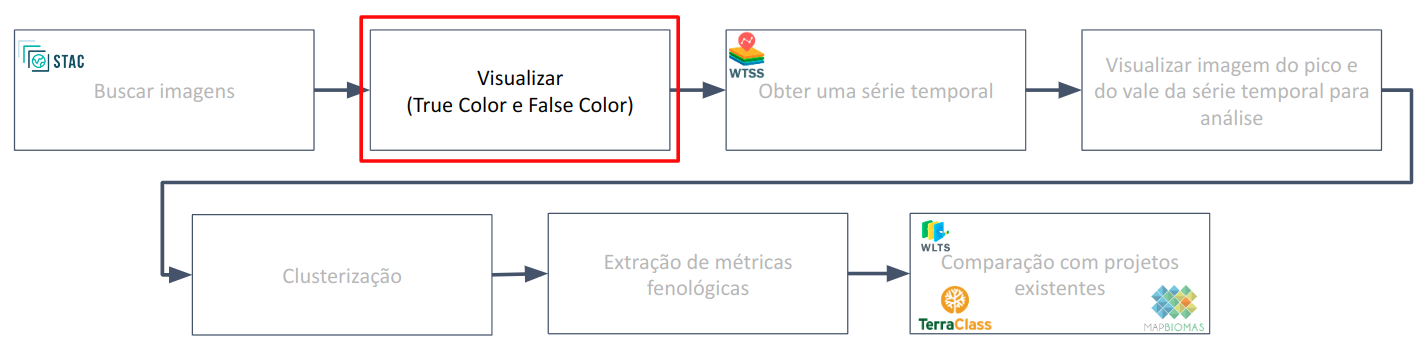

Para recuperar a matrix de pixels da imagem indicada no atributo `href` do *asset* será utilizada a biblioteca `rasterio`.

In [ ]:
# !pip install rasterio

Vamos fazer a visualização desse dado.

OBS: Pode demorar um pouco a depender da conexão com a internet, pois estamos obtendo uma banda inteira da imagem.

In [ ]:
import rasterio
from matplotlib import pyplot as plt

with rasterio.open(B04.href) as src:
    band = src.read(1)

plt.imshow(band, cmap='gray')
plt.show()

Agora podemos realizar a busca no catálogo usando `intersects`:

In [ ]:
item_search = catalogo.search(
    collections = [sentinel2],
    intersects = geometry_union,
    datetime = '2024-01-01/2025-03-21',
    limit = 100
)

In [ ]:
item_search.matched()

De posse do resultado da pesquisa, podemos gerar uma coleção de feições para facilitar a manipulação do resultado:

In [ ]:
items = item_search.item_collection()
items

## Recuperando parte de uma imagem correspondente a uma região
<hr style="border:1px solid #0077b9;">

Vamos definir algumas funções auxiliares para nos ajudar nesse Jupyter Notebook.

- `normalize`: Normaliza, para visualização, o valor de imagens.

- `read_img`: Lê uma imagem usando Window.

- `read_bdcimg_using_window_from_4326`: Lê parte de uma imagem (Window) na projeção usada pelo projeto BDC a partir de coordenadas em EPSG 4326.

In [ ]:
import numpy as np
from pyproj import Transformer
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.windows import from_bounds, Window

def read_img(uri: str, window: Window = None, masked: bool = True):
    """Read raster window as numpy.ma.masked_array."""
    with rasterio.open(uri) as src:
        return src.read(1, window=window, masked=masked)

def read_bdcimg_using_window_from_4326(uri: str, bbox, transformer):
    """Read raster window as numpy using EPSG:4326 to crop the window."""
    x1, y1, x2, y2 = bbox
    x1_reproj, y1_reproj = transformer.transform(x1, y1)
    x2_reproj, y2_reproj = transformer.transform(x2, y2)
    with rasterio.open(uri) as src:
        window = from_bounds(x1_reproj, y1_reproj, x2_reproj, y2_reproj, src.transform)
        rst = src.read(1, window=window)
        window_transform = src.window_transform(window)
    return rst, window_transform

def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

Neste exemplo, vamos visualizar a imagem do primeiro *asset* usando cor verdadeira e falsa cor.

Podemos ver o nome e url de cada asset desse item:

In [ ]:
assets = items[0].assets
assets

Vamos armazenar a url dos assets das bandas azul, verde, vermelho e infra-vermelho próximo.

In [ ]:
blue_asset = assets['B02']
green_asset = assets['B03']
red_asset = assets['B04']
nir_asset = assets['B08']

blue_asset.href

Como vamos abrir uma imagem que tem uma projeção customizada, vamos abrir os metadados de um primeiro asset e ler o CRS dele. Para assim termos um transformador de projeção.

In [ ]:
from pyproj.crs import CRS

# Create the transformer
crs = rasterio.open(blue_asset.href).crs
in_proj = CRS.from_epsg(4326)
out_proj = CRS.from_user_input(crs)
transformer = Transformer.from_crs(in_proj, out_proj, always_xy=True)

Agora podemos usar o *Window* para abrir somente um pedaço da imagem

In [ ]:
b02_image, window_transform = read_bdcimg_using_window_from_4326(items[7].assets['B02'].href, bbox, transformer)
b03_image, _ = read_bdcimg_using_window_from_4326(items[7].assets['B03'].href, bbox, transformer)
b04_image, _ = read_bdcimg_using_window_from_4326(items[7].assets['B04'].href, bbox, transformer)
b08_image, _ = read_bdcimg_using_window_from_4326(items[7].assets['B08'].href, bbox, transformer)

Assim podemos visualizar as 4 imagens carregadas:

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 4))
ax1.imshow(b02_image, cmap='gray')
ax1.set_title("Banda 2 (Azul)")
ax2.imshow(b03_image, cmap='gray')
ax2.set_title("Banda 3 (Verde)")
ax3.imshow(b04_image, cmap='gray')
ax3.set_title("Banda 4 (Vermelho)")
ax4.imshow(b08_image, cmap='gray')
ax4.set_title("Banda 8 (Infra-vermelho Próximo)")

Podemos fazer um stack e visualizar a *Cor Verdadeira*:

In [ ]:
rgb_normalized_stack = np.dstack((normalize(b04_image), normalize(b03_image), normalize(b02_image)))
plt.imshow(rgb_normalized_stack)

Bem como compor uma *Falsa Cor*

In [ ]:
rgb_normalized_stack = np.dstack((normalize(b08_image), normalize(b04_image), normalize(b03_image)))
plt.imshow(rgb_normalized_stack)

Podemos inclusive fazer a visualização dessa imagem no nosso mapa Folium.

OBS: como nosso dado não encontra-se no EPSG 4326, precisaremos reprojetar e usar os limites do Window utilizado.

In [ ]:
from folium import raster_layers

dst_crs = "EPSG:4326"
height, width = rgb_normalized_stack.shape[:2]

dst_transform, dst_width, dst_height = calculate_default_transform(
    crs, dst_crs, width, height, *rasterio.transform.array_bounds(height, width, window_transform)
)

dst_image = np.zeros((dst_height, dst_width, 3), dtype=np.float32)
for i in range(3):  # Reprojetando cada banda (R, G, B)
    reproject(
        source=rgb_normalized_stack[:, :, i],
        destination=dst_image[:, :, i],
        src_transform=window_transform,
        src_crs=crs,
        dst_transform=dst_transform,
        dst_crs=dst_crs,
        resampling=Resampling.nearest
    )

# Calcular os bounds reprojetados
min_lon, min_lat, max_lon, max_lat = rasterio.transform.array_bounds(dst_height, dst_width, dst_transform)
bounds = [[min_lat, min_lon], [max_lat, max_lon]]

# Definir Alpha = 0 onde R, G e B forem 0
mask = (dst_image[:, :, 0] == 0) & (dst_image[:, :, 1] == 0) & (dst_image[:, :, 2] == 0)

# Criar um array com 4 canais (RGBA)
dst_image_rgba = np.dstack((dst_image, np.ones((dst_height, dst_width), dtype=np.float32)))

dst_image_rgba[mask, 3] = 0  # Define alpha = 0 para pixels pretos

image_overlay = raster_layers.ImageOverlay(
    image=dst_image_rgba,
    bounds=bounds,
    opacity=1,
    colormap=lambda x: dst_image_rgba[x]
).add_to(m)

m

# 3. Obter uma série temporal

---


Agora vamos obter e visualizar uma série temporal:

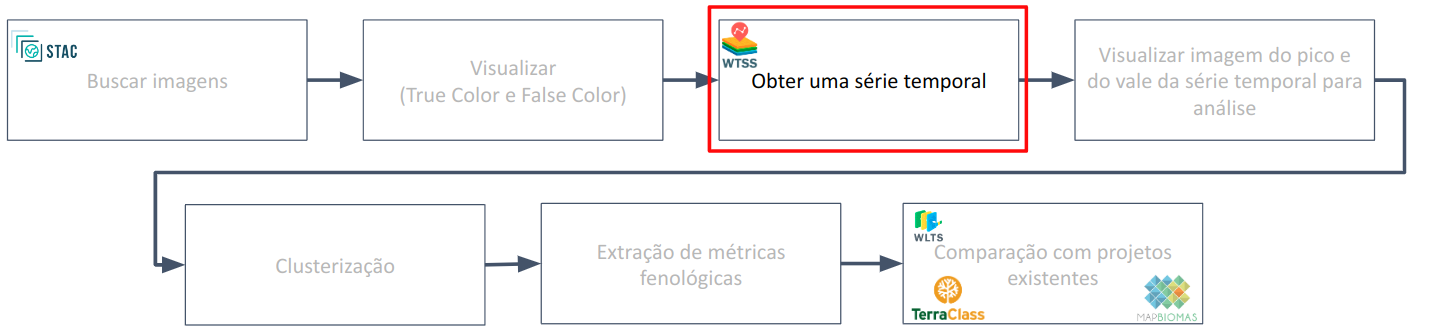

## <span style="color:#336699">Introdução ao Web Times Series Service (WTSS)<hr style="border:1px solid #0077b9;">

O **W**eb **T**ime **S**eries **S**ervice ou **WTSS** é um serviço web voltado para extração de séries temporais a partir de imagens de sensoriamento remoto organizadas na forma de cubos de dados. Dada uma localização ou região do espaço geográfico e um intervalo de tempo, a API deste serviço permite que os clientes requisitem as séries temporais para os produtos de dados do [Brazil Data Cube](https://data.inpe.br/bdc/web/) (Figura 1). Esse serviço pode ser utilizado a partir de um pacote construído para linguagem de programação [Python](https://github.com/brazil-data-cube/wtss.py), ou pode ser usado diretamente em interfaces gráficas com o usuário, por meio de [plugin do QGIS](https://github.com/brazil-data-cube/wtss-qgis) ou de componente gráfico de aplicações como o [Data Cube Explorer](https://data.inpe.br/bdc/explorer/) e [TerraCollect](https://data.inpe.br/bdc/terracollect/).

<center>
    <img src="https://geo-credito-rural.github.io/_images/overview.png" width="80%" />
    <br/>
    <b>Figura 1</b> - Visão geral do serviço WTSS.
</center>


<br/><br/>


O WTSS é baseado em três operações (Figura 2):
- `list_coverages`: Retorna a lista de produtos de dados, isto é, cubos de dados, disponíveis no serviço para consulta.

- `describe_coverage`: Retorna metadados básicos de um determinado cubo de dados.

- `time_series`: Consulta a lista de valores associadas a uma dada localização ou região do espaço geográfico e um intervalo de tempo.


**Nota:** O projeto original do WTSS utilizava a nomenclatura de *coverage* para se referir aos produtos de dados regulares no espaço e no tempo, como é o caso dos cubos de dados do Brazil Data Cube.


<br/><br/>


<center>    
    <img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/wtss-operations.png?raw=true" align="center" width="768"/>
    <br/>
    <b>Figura 2</b> - Operações do Serviço WTSS.
    <br/>
    <b>Fonte</b>: Galeria de Código do Brazil Data Cube.
</center>


<br/><br/>


O pacote para a linguagem Python fornece abstrações próprias para utilização dessas operações.

## Cliente WTSS no Python
<hr style="border:1px solid #0077b9;">

<br/>

Para demonstrar o acesso aos produtos de dados do Brazil Data Cube, iremos utilizar uma bibloteca de software livre para Python denominada [wtss.py](https://github.com/brazil-data-cube/wtss.py) (`wtss`).

Para instalar essa biblioteca no ambiente Jupyter, pode ser utilizado o seguinte comando `pip install`:

In [ ]:
# !pip install wtss==2.0.0a3

Uma vez instalada a biblioteca `wtss`, podemos carregar suas funcionalidades através do comando `import`, como mostrado abaixo:

In [ ]:
import wtss

Em geral, uma biblioteca do ecossistema Python possui uma constante especial para informar a versão da biblioteca carregada. Abaixo, apresentamos a versão carregada  da biblioteca `wtss`:

In [ ]:
wtss.__version__

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/list-coverages.png?raw=true" align="right" width="220"/>

## Verificando os Produtos de Dados Disponíveis no Serviço
<hr style="border:1px solid #0077b9;">

<br/><br/>

O endereço do serviço WTSS do BDC é https://data.inpe.br/bdc/wtss/v4/. Para descobrir os cubos de dados disponíveis para acesso nesse serviço,
é possível utilizar a classe `WTSS` do pacote `wtss`. Ao criar um objeto dessa classe, devemos informar a URL do serviço:

In [ ]:
servico = wtss.WTSS('https://data.inpe.br/bdc/wtss/v4/')

O WTSS utiliza a terminologia de **coverages** para se referir aos cubos de dados do Brazil Data Cube. A propriedade `coverages` retorna uma lista com os identificadores dos cubos de dados, isto é, das *coverages*, que podem ser consultadas pelo serviço:

In [ ]:
servico.coverages

Repare que os identificadores retornados pela propriedade `coverages` são os mesmos usados no catálogo STAC. Seus significados podem ser consultados no [Data Cube Explorer](https://data.inpe.br/bdc/explorer/), ou no [STAC Browser](https://data.inpe.br/stac/browser/) ou diretamente no [serviço STAC](https://data.inpe.br/bdc/stac/).

**Observação:** A documentação da classe `WTSS` pode ser vista [aqui](https://wtss.readthedocs.io/en/latest/class_wtss.html).

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/describe-coverage.png?raw=true" align="right" width="220"/>

## Recuperando os Metadados de um Produto
<hr style="border:1px solid #0077b9;">

<br/>

Os identificadores retornados pela propriedade `coverages` podem ser utilizados nas operações seguintes do serviço, tanto para recuperação de metadados quanto da série temporal. O operador `[]` em um objeto `WTSS` permite acessar o metadado de um cubo de dados específico. Por exemplo, vamos considerar o cubo de dados Sentinel-2, com resolução espacial de 10 metros e composição temporal de 16 dias. Este produto é identificado na lista anterior como `S2-16D-2`. Vamos recuperar seus metadados no serviço WTSS:

In [ ]:
cubo_s2 = servico['S2-16D-2']
cubo_s2

Os metadados acima são um subconjunto dos metadados disponíveis no STAC e incluem:

- nome do cubo de dados

In [ ]:
cubo_s2.name

- descrição:

In [ ]:
cubo_s2.description

- Atributos (bandas ou índices espectrais):

In [ ]:
cubo_s2.attributes

- Retângulo envolvente da base de imagens do cubo de dados, representado como uma geometria do tipo `Polygon` da bibloteca `Shapely`.

In [ ]:
cubo_s2.spatial_extent

- Instantes de tempo das obervações disponíveis no cubo.

In [ ]:
timeline = cubo_s2.timeline

ultima_data_disponivel = timeline[0]
primeira_data_disponivel = timeline[-1]

print(f'Intervalo: [{primeira_data_disponivel}, {ultima_data_disponivel}]')

**Observação:** A documentação da classe `Coverage` pode ser vista [aqui](https://wtss.readthedocs.io/en/latest/class_coverage.html).

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/time-series.png?raw=true" align="right" width="220"/>

## Recuperando a Série Temporal
<hr style="border:1px solid #0077b9;">

<br/><br/>

O método `ts` de um objeto `Coverage` permite recuperar a série temporal para uma dada localização ou região e conjunto de atributos. Vamos considerar o `cubo_s2` obtido anteriormente e recuperar as séries temporais para os atributos `NDVI` e `B08` (banda do infravermelho próximo ou NIR) na localização de latitude `-12.32800` e longitude `-45.90710` entre 01 de Janeiro de 2022 e 31 de Dezembro de 2023:

In [ ]:
lat, lon = -12.32800, -45.90710

In [ ]:
folium.Marker(
    [lat, lon],
    popup="Pto",
).add_to(m)

m

In [ ]:
ts_search = cubo_s2.ts(attributes=('NDVI', 'B08'),
                       latitude=lat, longitude=lon,
                       start_date='2024-01-01', end_date='2025-03-21')
ts_search

A propriedade `ts` permite recuperar um objeto representando as séries temporais:

In [ ]:
ts = ts_search.ts
ts

O objeto retornado `ts_search` (`TimeSeriesSearch`) possui métodos para recuperação da série temporal e para sua visualização:

In [ ]:
ts_search.plot()

O eixo do tempo, com os valores de datas, pode ser acessado com a propriedade `timeline`:

In [ ]:
ts.timeline

Os nomes dos atributos recuperados nas séries pode ser acessados pela propriedade `attributes`:

In [ ]:
ts.attributes

E os valores da série para cada atributo podem ser recuperados pelo método `values`:

In [ ]:
ts.values('NDVI')[0]

## Filtragem ou Remoção de Ruídos
<hr style="border:1px solid #0077b9;">

<br/><br/>

A biblioteca `scipy` se baseia na biblioteca `NumPy` e fornece funções adicionais para várias operações matemáticas e científicas, incluindo processamento de sinais e filtragem, dentre outras. Abaixo, são listados alguns módulos e funcionalidades que o SciPy oferece:

- Álgebra Linear (scipy.linalg).

- Otimização (scipy.optimize).

- Integração e EDOs (scipy.integrate).

- Interpolação (scipy.interpolate).

- Transformadas (scipy.fft).

- Estatísticas (scipy.stats).

- Processamento de Sinais (scipy.signal): Funções para processamento de sinais, incluindo filtros e análise de sistemas. Na filtragem abaixo iremos utilizar o módulo `scipy.signal` para aplicar o filtro **Savitzky–Golay** sobre as séries temporais obtidas.

In [ ]:
from scipy.signal import savgol_filter

In [ ]:
window_size = 8

poly_order = 5

ndvi_smooth = savgol_filter(ts.values('NDVI'), window_size, poly_order)
ndvi_smooth.T.shape

In [ ]:
np.linspace(0, len(ts.timeline), num=23, endpoint=True)

In [ ]:
fig = plt.figure( figsize=plt.figaspect(0.3) )

plt.xlabel('Data')
plt.ylabel('NDVI')

plt.xticks(np.linspace(0, len(ts.timeline) - 1, num=23, endpoint=True))

plt.plot(ts.timeline, ts.values('NDVI')[0], color="blue", linewidth=1.0, label='NDVI')

plt.plot(ts.timeline, ndvi_smooth.T, color="red", linewidth=1.0, label='NDVI Suavizado')

plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

plt.legend()

fig.autofmt_xdate()

plt.show()

# 4. Visualizar imagem do pico e do vale da série temporal para análise

---


Agora que vimos uma série, podemos inclusive visualizar as imagens do pico e vale dessa série para fazermos uma breve análise.

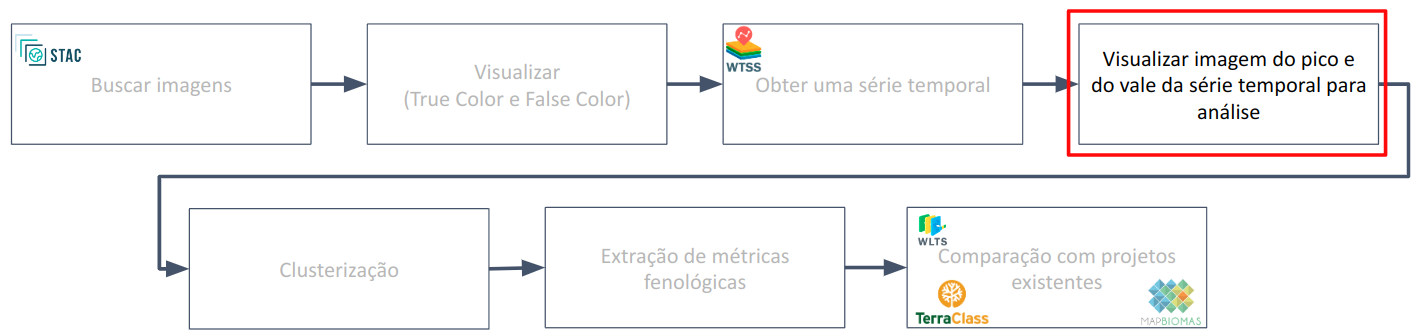

In [ ]:
serie_exemplo = ts.values('NDVI')[0]
min_pos = np.argmin(serie_exemplo)
max_pos = np.argmax(serie_exemplo)

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.3))

plt.xlabel('Data')
plt.ylabel('NDVI')

plt.plot(ts.timeline, ts.values('NDVI')[0], marker='o', linestyle='-', color='b', label='NDVI')

plt.scatter(ts.timeline[min_pos], ts.values('NDVI')[0][min_pos], color='red', label='Menor Valor', zorder=len(ts.values('NDVI')[0]))
plt.scatter(ts.timeline[max_pos], ts.values('NDVI')[0][max_pos], color='green', label='Maior Valor', zorder=len(ts.values('NDVI')[0]))

# Exibir apenas as datas de mínimo e máximo no eixo x
plt.xticks([ts.timeline[min_pos], ts.timeline[max_pos]], [ts.timeline[min_pos], ts.timeline[max_pos]], rotation=45)

plt.show()

Lembrando que usamos o mesmo produto e periodo de tempo na busca com STAC e com WTSS, podemos usar as mesmas posições para localizar a data com menor e maior valores na série.

OBS: a ordem retornada nos items STAC pode estar da mais recente para a mais antiga, então atente-se a essa posição!

In [ ]:
sorted_items_list = sorted(items, key=lambda x: x.id)
sorted_items_list

In [ ]:
min_assets = sorted_items_list[min_pos].assets

min_b02_image, _ = read_bdcimg_using_window_from_4326(min_assets['B02'].href, bbox, transformer)
min_b03_image, _ = read_bdcimg_using_window_from_4326(min_assets['B03'].href, bbox, transformer)
min_b04_image, _ = read_bdcimg_using_window_from_4326(min_assets['B04'].href, bbox, transformer)

min_rgb_normalized_stack = np.dstack((normalize(min_b04_image), normalize(min_b03_image), normalize(min_b02_image)))

##

max_assets = sorted_items_list[max_pos].assets

max_b02_image, _ = read_bdcimg_using_window_from_4326(max_assets['B02'].href, bbox, transformer)
max_b03_image, _ = read_bdcimg_using_window_from_4326(max_assets['B03'].href, bbox, transformer)
max_b04_image, _ = read_bdcimg_using_window_from_4326(max_assets['B04'].href, bbox, transformer)

max_rgb_normalized_stack = np.dstack((normalize(max_b04_image), normalize(max_b03_image), normalize(max_b02_image)))

##

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.imshow(min_rgb_normalized_stack)
ax2.imshow(max_rgb_normalized_stack)

## Recuperando a Série Temporal de uma área
<hr style="border:1px solid #0077b9;">

<br/><br/>

Nesta seção vamos apresentar as séries temporais associadas à área inteira.
primeiramente, vamos selecionar um unico poligono do nosso .shp inicial e visualiza-lo:

In [ ]:
f = folium.Figure(width=1000, height=300)

polygon = my_shp.iloc[22].geometry

centroide = polygon.centroid

m = folium.Map(location=[centroide.y, centroide.x],
               zoom_start=13,
               tiles="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}",
               attr="Esri World Imagery"
               ).add_to(f)

folium.GeoJson(polygon).add_to(m)

m

Finalmente, vamos recuperar as séries temporais da area apresentada no mapa acima, por meio do client Python do serviço WTSS:

In [ ]:
ts_search = cubo_s2.ts(attributes=('NDVI', 'B08'),
                       geom=polygon,
                       start_date='2024-01-01', end_date='2025-03-21')
ts_search

In [ ]:
ts_search.plot()

Podemos ter mais informações sobre as séries acessando o atributo `ts`:

In [ ]:
ts = ts_search.ts
ts

Para acessar todos os valores de NDVI por exemplo você pode acessar com:

In [ ]:
ts.values('NDVI') # Todas as séries

ts.values('NDVI')[0] # Primeira série

ts.values('NDVI')[1] # Segudna série

# 5. Clusterização

---


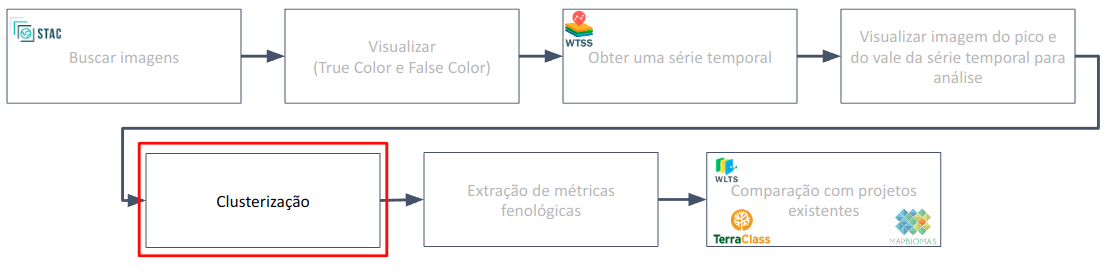

In [ ]:
sorted_items_list

## Extração de Timestamps
<hr style="border:1px solid #0077b9;">

A função `get_timestamps` extrai as datas únicas de um conjunto de itens STAC, convertendo-as para o formato "YYYYMM_DD". Usa `dict.fromkeys()` como técnica para remover duplicatas enquanto preserva a ordem original. Esta função é essencial para indexar temporalmente as séries que serão analisadas posteriormente.

In [ ]:
def get_timetamps(items):
    return list(dict.fromkeys([item.datetime.strftime("%Y_%m_%d") for item in items]))
timestamp = get_timetamps(items)
timestamp

## Processamento de Bandas para Extração de Séries Temporais
<hr style="border:1px solid #0077b9;">

A função `process_band` extrai séries temporais de uma banda específica (como NDVI ou B08) para todos os pixels dentro de uma geometria definida. O processo envolve:

1. Reprojeção da geometria para o sistema de coordenadas das imagens
2. Aplicação de máscara para extrair apenas os dados dentro da área de interesse
3. Organização dos dados em formato de série temporal por pixel
4. Tratamento de exceções para garantir consistência temporal

O resultado é uma matriz tridimensional onde cada linha representa um pixel, cada coluna representa um momento no tempo, e os valores são as medidas da banda espectral. Esta função também retorna uma máscara de pixels válidos e o perfil atualizado do raster para uso posterior.

In [ ]:
import tqdm
from rasterio.mask import mask
from rasterio.warp import transform_geom

def process_band(band, item_total, geometry):

    ts = []
    valid_pixels_mask = None
    first_valid_shape = None
    updated_profile = None
    geometry_dict = geometry.__geo_interface__

    with rasterio.open(item_total[0].assets[band].href) as src:
        dst_crs = src.crs

    geom_reproj = transform_geom('EPSG:4326', dst_crs, geometry_dict)

    for item in tqdm.tqdm(item_total, desc=f"Downloading {band}"):
        try:
            with rasterio.open(item.assets[band].href) as src:
                data, transform = mask(
                    src, [geom_reproj], crop=True,
                    all_touched=True, nodata=src.nodata, filled=False
                )

                flat_data = data[0].flatten()
                ts.append(flat_data)

                if valid_pixels_mask is None:
                    valid_pixels_mask = ~data[0].mask.flatten()
                    first_valid_shape = flat_data.shape

                    updated_profile = src.profile.copy()
                    updated_profile.update({
                        "height": data.shape[1],
                        "width": data.shape[2],
                        "transform": transform
                    })

        except Exception as e:
            print(f"Erro em {band}, item {item.id}: {e}")
            if first_valid_shape is not None:
                ts.append(np.full(first_valid_shape, np.nan))

    if ts:
        data_array = np.transpose(np.array(ts), (1, 0))
        if valid_pixels_mask is None:
            valid_pixels_mask = np.ones(data_array.shape[0], dtype=bool)
        return data_array, valid_pixels_mask, updated_profile
    else:
        return np.array([]), np.array([]), None


In [ ]:
ts, mask, profile= process_band('NDVI', sorted_items_list, geometry_union)

## Conversão de Coordenadas Pixel para Geográficas
<hr style="border:1px solid #0077b9;">

Este código estabelece a correspondência entre cada pixel no raster e suas coordenadas geográficas (latitude/longitude). Cria-se uma grade (meshgrid) de coordenadas pixel, que é transformada para o sistema de coordenadas do raster e então para WGS84 (EPSG:4326).

Os arrays `lons` e `lats` resultantes são fundamentais para georreferenciar os resultados das análises, permitindo localizar precisamente cada série temporal no espaço geográfico.

In [ ]:
h, w = profile['height'], profile['width']
transform = profile['transform']
src_crs = profile['crs']
dst_crs = "EPSG:4326"

cols, rows = np.meshgrid(np.arange(w), np.arange(h))
xs, ys = rasterio.transform.xy(transform, rows, cols)

xs = np.array(xs)
ys = np.array(ys)

transformer = Transformer.from_crs(src_crs, dst_crs, always_xy=True)
lons, lats = transformer.transform(xs, ys)

In [ ]:
valid_ndvi = ts[mask] / 10000

In [ ]:
valid_ndvi.shape

## Suavização de Séries Temporais
<hr style="border:1px solid #0077b9;">

A suavização das séries temporais é realizada com o filtro Savitzky-Golay, implementado através da função `savgol_filter` da biblioteca scipy.signal. Este método é particularmente adequado para séries temporais de sensoriamento remoto, pois preserva características importantes como picos e vales enquanto remove ruídos de alta frequência.

Os parâmetros utilizados (`window_size=12, poly_order=4`) foram escolhidos para equilibrar a remoção de ruídos com a preservação da variabilidade fenológica natural. A suavização é aplicada ao longo do eixo temporal (axis=1), preparando os dados para análises subsequentes como clusterização e extração de métricas fenológicas.

In [ ]:
window_size, poly_order = 12, 4
smoothed_ndvi = savgol_filter(valid_ndvi, window_size, poly_order, axis=1)

## Visualização de Série Temporal Individual
<hr style="border:1px solid #0077b9;">

Este código gera uma visualização comparativa entre a série temporal original e a série suavizada de NDVI para um pixel específico (índice 15552). A visualização inclui:

- Série original plotada com linha tracejada e marcadores nos pontos de observação
- Série suavizada plotada com linha contínua para facilitar a interpretação dos padrões
- Formatação do eixo temporal para exibir as datas em formato legível
- Estilização do gráfico com título, legendas e grade para melhor interpretação

Esta visualização permite validar visualmente a eficácia do processo de suavização e identificar padrões temporais no comportamento da vegetação para um ponto específico na área de estudo.

In [ ]:
formatted_timestamps = [str(ts)[:10] for ts in np.unique(timestamp)]

plt.figure(figsize=(12, 5))
plt.plot(valid_ndvi[15552], label='NDVI original', color='gray', linewidth=1.5, linestyle='--', marker='o', markersize=4)
plt.plot(smoothed_ndvi[15552], label='NDVI suavizado', color='green', linewidth=2)

plt.title("Série temporal de NDVI - Pixel 15552", fontsize=14, fontweight='bold')
plt.xlabel("Tempo", fontsize=12)
plt.ylabel("NDVI", fontsize=12)

plt.xticks(np.arange(0, len(formatted_timestamps), 2), formatted_timestamps[::2], rotation=45, ha='right')
plt.yticks(np.arange(0, 1.2, 0.2))

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.legend(frameon=True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install xpysom

In [ ]:
for k, v in profile.items():
    print(f"{k:>12}: {v}")

In [ ]:
from xpysom import XPySom

## Agrupamento de Séries Temporais com SOM
<hr style="border:1px solid #0077b9;">

Este trecho implementa um Mapa Auto-Organizável (Self-Organizing Map ou SOM) para agrupar séries temporais com comportamentos similares. O SOM é configurado com uma grade 3x3 (9 neurônios) para identificar até 9 padrões distintos de comportamento temporal.

O treinamento usa uma amostra das séries temporais suavizadas (a cada 10 pixels) para reduzir o tempo de processamento. Após o treinamento, cada série temporal é classificada de acordo com o neurônio mais próximo (winner), resultando no array `predictions` que associa cada pixel a um padrão temporal específico.

Este método não-supervisionado é particularmente útil para identificar padrões fenológicos distintos, como diferentes culturas agrícolas, tipos de vegetação natural ou áreas urbanas.

In [ ]:
grade = 3
som = XPySom(grade,grade, len(smoothed_ndvi[0]), random_seed=123, n_parallel=0, xp = np)
som.train(smoothed_ndvi[::10], 20)

In [ ]:
neuron_weights = np.array([som.get_weights()[i][j] for i in range(grade) for j in range(grade)])
predictions = som.winner(smoothed_ndvi)
position = {(i, j): idx for idx, (i, j) in enumerate([(i, j) for i in range(grade) for j in range(grade)])}
predictions = np.array([position[tuple(coord)] for coord in predictions]).astype("int")

## Visualização dos Padrões Temporais Identificados pelo SOM
<hr style="border:1px solid #0077b9;">

Este código cria uma visualização em grade que representa cada neurônio do SOM e as séries temporais associadas a ele. Para cada cluster:

1. São extraídas todas as séries temporais classificadas naquele grupo
2. Calcula-se a média e o desvio padrão das séries para cada ponto no tempo
3. Plota-se a série média (vermelho), o codebook do neurônio (branco) e o intervalo de variação (área cinza)
4. Adiciona-se informações sobre a quantidade e porcentagem de pixels em cada cluster

A visualização usa cores de fundo distintas para cada cluster, facilitando a associação com o mapa espacial. Esta representação permite identificar e interpretar os diferentes padrões fenológicos encontrados na área de estudo, como ciclos de cultivo agrícola, vegetação perene, ou áreas com comportamento anômalo.

In [ ]:
from matplotlib import cm

unique_predictions, counts = np.unique(predictions, return_counts=True)
formatted_timestamps = [str(ts)[:10] for ts in np.unique(timestamp)]

fig, axs = plt.subplots(grade, grade, figsize=(16, 8), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.1)

total_series = len(predictions)

for plot_idx, ax in enumerate(axs.flat):
    if plot_idx >= len(unique_predictions):
        ax.axis('off')
        continue

    indices = np.where(predictions == unique_predictions[plot_idx])[0]
    cluster_series = smoothed_ndvi[indices]

    ts_mean = np.mean(cluster_series, axis=0)
    std_devs = np.std(cluster_series, axis=0)
    upper_limit = ts_mean + std_devs
    lower_limit = ts_mean - std_devs

    ax.plot(ts_mean, color='red', linewidth=0.8, label="mean")
    ax.plot(neuron_weights[plot_idx], color='white', linewidth=2, label="codebook")

    ax.set_facecolor(cm.viridis(plot_idx / (grade * grade - 1)))
    ax.set_xticks(np.arange(0, len(neuron_weights[plot_idx]), 2))
    ax.set_xticklabels(formatted_timestamps[::2], rotation=45, ha='right', weight='light')
    ax.set_yticks(np.arange(-1, 1.2, 0.2))
    ax.grid(True, linestyle='--', color='white', linewidth=0.3)
    ax.axhline(0, color='white', linestyle='--', linewidth=0.3)

    percent_series = (counts[plot_idx] / total_series) * 100
    ax.set_title(f"N° de séries temporais: {counts[plot_idx]} ({percent_series:.2f}%)", color='black', fontsize=12, fontweight='bold')

    ax.fill_between(range(len(neuron_weights[plot_idx])), lower_limit, upper_limit, color='gray', alpha=0.9, linewidth=0, label="std")
    ax.legend()

    ax.text(0.02, 0.95, str(plot_idx), transform=ax.transAxes, color='white', fontsize=12, fontweight='bold', va='top', ha='left')


## Mapeamento Espacial dos Padrões Temporais
<hr style="border:1px solid #0077b9;">

Este código gera um mapa espacial que mostra a distribuição geográfica dos clusters identificados pelo SOM. O mapa é criado:

1. Convertendo o array de classificação para um formato raster 2D
2. Mascarando áreas sem dados válidos (valor 255)
3. Plotando o resultado com coordenadas geográficas e esquema de cores consistente com as visualizações anteriores
4. Adicionando legenda para identificação dos clusters

Este mapa permite analisar a distribuição espacial dos diferentes padrões temporais identificados, revelando estruturas como talhões agrícolas, áreas de vegetação natural, corpos d'água, ou infraestrutura urbana. A distribuição espacial dos padrões temporais frequentemente corresponde a diferentes usos e coberturas da terra.

In [ ]:
import matplotlib.patches as mpatches

height = profile['height']
width = profile['width']
result = np.full((height * width), 255, dtype=np.uint8)
result[mask] = predictions
unique_clusters = np.unique(predictions)
unique_clusters = unique_clusters[unique_clusters != 255]
masked_result = np.ma.masked_equal(result.reshape(height, width), 255)

fig, ax = plt.subplots(figsize=(12, 10))
img = ax.imshow(
    masked_result,
    extent=[bounds[0][1], bounds[1][1], bounds[0][0], bounds[1][0]],
    cmap='viridis'
)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Classificação do SOM")

patches = [mpatches.Patch(color=img.cmap(img.norm(i)), label=f"Cluster: {i}") for i in unique_clusters]
legend = ax.legend(
    handles=patches,
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    fontsize=10,
    frameon=True
)
legend.get_frame().set_edgecolor('gray')

plt.tight_layout()
plt.show()


## Extração de Séries Temporais Representativas
<hr style="border:1px solid #0077b9;">

Este trecho identifica séries temporais representativas para cada cluster encontrado pelo SOM. Em vez de usar a média, que poderia resultar em séries artificiais, o método seleciona um pixel real como representante de cada padrão:

1. Para cada cluster, identifica-se todos os pixels pertencentes a ele
2. Seleciona-se o pixel central (mediano) como representativo do grupo
3. Armazena-se a série temporal completa e as coordenadas geográficas desse pixel
4. Organiza-se os dados em um DataFrame pandas para facilitar o acesso

Esta abordagem permite selecionar localizações específicas que representam bem cada padrão temporal identificado, possibilitando análises complementares como consultas ao serviço WLTS (Web Land Trajectory Service) para verificar o histórico de uso e cobertura da terra nesses pontos específicos.

In [ ]:
import pandas as pd

ts_aux = np.full((height * width, len(timestamp)), 255, dtype=np.float32)
ts_aux[mask] = smoothed_ndvi

classes = np.unique(result[result != 255])
result_flat = result.ravel()
ts_representatives = []
lat_representatives = []
lon_representatives = []

for c in classes:
    idxs = np.where(result_flat == c)[0]
    center_idx = idxs[len(idxs) // 2]
    ts_representatives.append(ts_aux[center_idx])
    lat_representatives.append(lats.ravel()[center_idx])
    lon_representatives.append(lons.ravel()[center_idx])

df = pd.DataFrame({
    'cluster': classes,
    'lat': lat_representatives,
    'lon': lon_representatives,
    'series': ts_representatives
})


## Visualização das Séries Representativas vs Codebooks
<hr style="border:1px solid #0077b9;">

Este código cria uma visualização em grade comparando as séries temporais representativas (pixels reais) com os codebooks (neurônios) do SOM. Para cada cluster:

1. Obtém-se a série temporal do pixel representativo e suas coordenadas geográficas
2. Plota-se a série representativa (branco) e o codebook correspondente (vermelho)
3. Exibe-se as coordenadas geográficas precisas no título para referência
4. Armazena-se essas coordenadas para uso posterior com o serviço WLTS

Esta visualização permite avaliar quão bem os neurônios do SOM capturaram os padrões temporais reais presentes na área de estudo. A comparação entre séries reais e codebooks ajuda a validar o processo de clusterização e fornece insights sobre os diferentes comportamentos fenológicos presentes na região analisada.

In [ ]:
formatted_timestamps = [str(ts)[:10] for ts in np.unique(timestamp)]

fig, axs = plt.subplots(grade, grade, figsize=(16, 8), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.1)

unique_predictions = np.unique(predictions)

lista_lat_lon = [] #Sera usado na parte do WLTS
for plot_idx, ax in enumerate(axs.flat):
    if plot_idx >= len(unique_predictions):
        ax.axis('off')
        continue

    row = df[df['cluster'] == unique_predictions[plot_idx]].iloc[0]
    representative_series = row['series']
    lat, lon = row['lat'], row['lon']
    lista_lat_lon.append((lat, lon)) #Sera usado na parte do WLTS

    ax.plot(representative_series, color='white', linewidth=2, label="representativa")
    ax.plot(neuron_weights[plot_idx], color='red', linewidth=0.8, label="codebook")
    ax.set_facecolor(cm.viridis(plot_idx / (grade * grade - 1)))
    ax.set_xticks(np.arange(0, len(representative_series), 2))
    ax.set_xticklabels(formatted_timestamps[::2], rotation=45, ha='right', weight='light')
    ax.set_yticks(np.arange(0, 1.2, 0.2))
    ax.grid(True, linestyle='--', color='white', linewidth=0.3)
    ax.axhline(0, color='white', linestyle='--', linewidth=0.3)

    ax.set_title(f"({lat:.4f}, {lon:.4f})", color='black', fontsize=12, fontweight='bold')
    ax.legend()
    ax.text(0.02, 0.95, str(plot_idx), transform=ax.transAxes, color='white', fontsize=12, fontweight='bold', va='top', ha='left')


# 6. Extração de métricas fenológicas

---


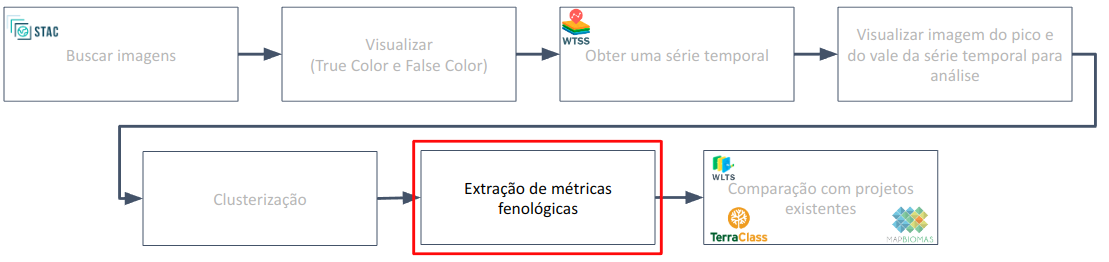

## <span style="color:#336699">Introdução ao Web Crop Phenology Metrics Service (WCPMS)<hr style="border:1px solid #0077b9;">


Chamado de Web Crop Phenology Metrics Service (WCPMS), o software extrai métricas fenológicas de grandes coleções de imagens observação da Terra, modeladas como cubos de dados multidimensionais, produzidas pelo projeto BDC do INPE.

Ele permite que os analistas calculem as métricas fenológicas na nuvem. O oposto dos algoritmos estabelecidos no local, portanto, sem a necessidade de fazer download de grandes conjuntos de dados de EO em seus computadores pessoais.

A arquitetura do serviço da Web proposto é composta por duas partes: (1) o lado do servidor e (2) o lado do cliente. O serviço da Web é executado no lado do servidor, de modo que tudo relacionado a ele, como as bibliotecas para cálculo de métricas fenológicas e o acesso ao serviço da Web para extração de séries temporais (WTSS), está na nuvem, portanto, não requer nenhuma instalação de pacote.

<div align="center">
    <figcaption><strong>Figure 1</strong> - Architecture of the web service for phenological metrics extraction </figcaption>
    <img src="https://github.com/GSansigolo/wcpms.py/blob/master/docs/sphinx/img/wcpms_architecture.png?raw=true" align="center" width="768"/>
    <br>
</div>

Criamos a biblioteca wcpms.py do zero para facilitar as operações de extração de fenologia. Essa biblioteca foi desenvolvida para ser interoperável com outras bibliotecas Python, permitindo assim que os usuários integrem bibliotecas estabelecidas em seus próprios fluxos de trabalho para pré ou pós-processamento e análise. A biblioteca wcpms.py tem um grupo de funções, as principais são:

- ``get_collections``: retorna em formato de lista o identificador exclusivo de cada um dos cubos de dados disponíveis no STAC (SpatioTemporal Asset Catalogs) do BDC.

- ``get_description``: retorna em formato de dicionário as informações sobre cada uma das métricas de fenologia, como código, nome, descrição e método.

- ``get_phenometrics``: retorna em formato de dicionário todas as métricas fenológicas calculadas para uma determinada localização espacial.

- ``get_phenometrics_region``: retorna, em formato de lista, as métricas fenológicas calculadas para cada centro de pixel dentro dos limites da região determinada, usando séries temporais de imagens de satélite.


Para saber mais, acesse a documentação em https://wcpms.readthedocs.io/en/latest.


## Cliente WCPMS no Python
<hr style="border:1px solid #0077b9;">

<br/>

Criamos a biblioteca wcpms.py do zero para facilitar as operações de extração de fenologia. Essa biblioteca foi desenvolvida para ser interoperável com outras bibliotecas Python, permitindo assim que os usuários integrem bibliotecas estabelecidas em seus próprios fluxos de trabalho para pré ou pós-processamento e análise.

Para demonstrar operações de extração de fenologia, criamos a biblioteca wcpms.py do zero para facilitar essas operações. Denominada [wcpms.py](https://github.com/brazil-data-cube/wcpms.py) (`wcpms`).

Para instalar essa biblioteca no ambiente Jupyter, pode ser utilizado o seguinte comando `pip install` (ele foi instalado no inicio do Notebook):

In [ ]:
# !pip install wcpms==0.2.0

In [ ]:
from wcpms import *

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/list-coverages.png?raw=true" align="right" width="220"/>

## Verificando os Produtos de Dados Disponíveis no Serviço
<hr style="border:1px solid #0077b9;">

<br/><br/>

O endereço do serviço WCPMS do BDC é https://data.inpe.br/bdc/wcpms. Depois disso, você deve adicionar a url do serviço `wcpms`:

In [ ]:
wcpms_url = 'https://data.inpe.br/bdc/wcpms'

Antes de criar uma consulta de cubo de dados, é importante selecionar um cubo de dados no catálogo do BDC. É possível obter uma lista com os cubos de dados disponíveis com a função `get_collections`:

In [ ]:
colections=get_collections(
    url = wcpms_url
)

colections

Repare que os identificadores retornados pela função `get_collections` são os mesmos usados no catálogo STAC. Seus significados podem ser consultados no [Data Cube Explorer](https://data.inpe.br/bdc/explorer/), ou no [STAC Browser](https://data.inpe.br/stac/browser/) ou diretamente no [serviço STAC](https://data.inpe.br/bdc/stac/).

**Observação:** Para saber mais, acesse a documentação do WCPMS em https://wcpms.readthedocs.io/en/latest.

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/time-series.png?raw=true" align="right" width="220"/>

## Recuperando Métricas Fenológicas
<hr style="border:1px solid #0077b9;">

<br/><br/>

Para facilitar o uso, há uma função para criar uma consulta de cubo de dados chamada `cube_query`. A célula criará um objeto chamado `datacube` que salva o cubo de dados BDC desejado (`S2-16D-2`). Para recuperar as métricas fenológicas associadas a localizações espaciais, calculando-as usando a série temporal `NDVI`, na localização de `latitude -29.202633381242652` e `longitude -55.95542907714844` de `1º de janeiro de 2022` a `31 de dezembro de 2022`, use a função `get_phenometrics`


In [ ]:
lat, lon = -12.2689, -45.8473

In [ ]:
f = folium.Figure(width=1000, height=300)

m = folium.Map(location=[lat, lon],
               zoom_start=14,
               tiles="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}",
               attr="Esri World Imagery"
).add_to(f)

folium.Marker(
    [lat, lon],
    popup="Pto",
).add_to(m)

m

In [ ]:
datacube=cube_query(
    collection="S2-16D-2",
    start_date="2022-01-01",
    end_date="2022-12-31",
    freq='16D',
    band="NDVI"
)

In [ ]:
pm=get_phenometrics(
    url=wcpms_url,
    cube=datacube,
    latitude=lat, longitude=lon
)

In [ ]:
pm['phenometrics']

In [ ]:
pm['phenometrics']['sos_t']

In [ ]:
pm['phenometrics']['eos_t']

In [ ]:
pm['timeseries']['timeline']

In [ ]:
plot_phenometrics(datacube, pm)

## Recuperando Métricas Fenológicas das Áreas Clusterizadas
<hr style="border:1px solid #0077b9;">

<br/><br/>

Nesta seção vamos apresentar extração de métricas fenológicas de cada uma das área inteiras clusterizadas.

In [ ]:
from datetime import datetime

formatted_timestamps = [str(ts)[:10] for ts in np.unique(timestamp)]

fig, axs = plt.subplots(grade, grade, figsize=(16, 8), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.1)

datacube=cube_query(
    collection="S2-16D-2",
    start_date="2024-01-01",
    end_date="2024-12-31",
    freq='16D',
    band="NDVI"
)

unique_predictions = np.unique(predictions)

for plot_idx, ax in enumerate(axs.flat):
    if plot_idx >= len(unique_predictions):
        ax.axis('off')
        continue

    row = df[df['cluster'] == unique_predictions[plot_idx]].iloc[0]
    representative_series_raw = row['series']
    representative_series = row['series'][:23]
    lat, lon = row['lat'], row['lon']

    dates_datetime64_full = pd.date_range(pd.to_datetime(datacube['start_date'], format='%Y-%m-%d'), periods=len(representative_series_raw), freq="16D")
    dates_datetime64 = pd.date_range(pd.to_datetime(datacube['start_date'], format='%Y-%m-%d'), periods=len(representative_series), freq="16D")

    phenometrics=get_phenometrics_region(
        url=wcpms_url,
        cube=datacube,
        timeseries=[dict(point=[float(lat),float(lon)],timeline=[date_obj.strftime('%Y-%m-%d') for date_obj in dates_datetime64],values=[float(float_obj) for float_obj in representative_series])]
    )

    p = phenometrics[0]['phenometrics']

    y_new = savgol_filter(phenometrics[0]['timeseries'], 3, 1)

    ax.plot(dates_datetime64_full, representative_series_raw, color='blue', label='NDVI', linewidth=0.6)
    ax.plot(dates_datetime64, y_new, color='red', label='Smooth NDVI', linewidth=0.6)

    if (p['sos_v'] < 1 and p['sos_v'] > -1):
        sos_time = datetime.strptime(p['sos_t'], '%Y-%m-%dT00:00:00')
        ax.plot(sos_time, p['sos_v'], 'go', label='_nolegend_')
        ax.annotate('SOS', [sos_time, p['sos_v']])

    if (p['eos_v'] < 1 and p['eos_v'] > -1):
        eos_time = datetime.strptime(p['eos_t'], '%Y-%m-%dT00:00:00')
        ax.plot(eos_time, p['eos_v'], 'go', label='_nolegend_')
        ax.annotate('EOS', [eos_time, p['eos_v']])

    if (p['eos_v'] < 1 and p['eos_v'] > -1 and p['sos_v'] < 1 and p['sos_v'] > -1):
        ax.axvspan(sos_time, eos_time, color=('#9af8ff', 0.3))

    if (p['vos_v'] < 1 and p['vos_v'] > -1):
        vos_time = datetime.strptime(p['vos_t'], '%Y-%m-%dT00:00:00')
        ax.plot(vos_time, p['vos_v'], 'go', label='_nolegend_')
        ax.annotate('VOS', [vos_time, p['vos_v']])

    if (p['pos_v'] < 1 and p['pos_v'] > -1):
        pos_time = datetime.strptime(p['pos_t'], '%Y-%m-%dT00:00:00')
        ax.plot(pos_time, p['pos_v'], 'go', label='_nolegend_')
        ax.annotate('POS', [pos_time, p['pos_v']])

    ax.set_title(f"({lat:.4f}, {lon:.4f})", color='black', fontsize=12, fontweight='bold')
    ax.legend()
    ax.text(0.02, 0.95, str(plot_idx), transform=ax.transAxes, color='white', fontsize=12, fontweight='bold', va='top', ha='left')

# 7. Comparação com projetos existentes

---


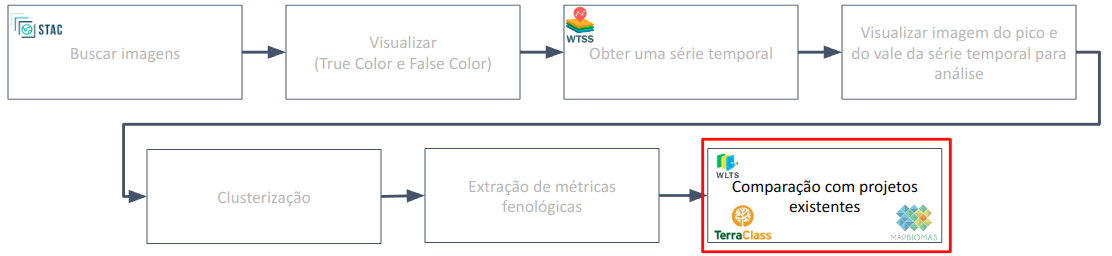

Vimos os clusters e métricas fenológicas para 9 pontos.
Esses pontos tem os seguintes lat lon:

In [ ]:
lista_lat_lon

Vamos agora usa-los para extrair a trajetória segundo o TerraClasse segundo o Mapbiomas.

## <span style="color:#336699">Introdução ao Web Land Trajectory Service (WLTS)
<hr style="border:1px solid #0077b9;">

O **W** eb **L** e **T** rajectory **S** service (WLTS) é um serviço web projetado para acessar e recuperar trajetórias de uso e cobertura da terra de diferentes tipos de fontes de dados. Por meio de uma API simples, traz o conceito de Trajetórias de Uso e Cobertura do Terra como uma abstração de alto nível. Dado um local e um intervalo de tempo, você pode recuperar a trajetória terrestre de muitas coleções de dados, incluindo informações dos projetos PRODES, DETER e TerraClass.

`Figura 1` mostra um exemplo de representação das trajetórias de uso e cobertura da terra extraídas de um conjunto de imagens classificadas, ordenadas temporalmente:


<center>
    <img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wlts/trajectory_def.png" width="600" />,
    <br/>
    <b>Figure 1</b> - Trajetória de uso e cobertura da terra.
</center>

O WLTS introduz os seguintes conceitos:

- **Collections**: refere-se a um conjunto de dados específico de uma determinada fonte de dados. Uma coleção pode ser representada por estruturas vetoriais ou raster. Possui um intervalo de tempo delimitado pelo tempo (tmin, tmax). Desta forma, cada Coleção possui um atributo de tempo associado, que é alinhado de acordo com a granularidade de tempo de cada projeto que disponibiliza a Coleção.

- **Class**: É o rótulo associado a um determinado item do dados, que corresponde aos tipos específicos de uso ou cobertura da terra, definidos pelo sistema de classificação da fonte de dados. Uma coleção consiste em um conjunto de classes.

- **Trajectory**: Dada uma localização espacial (x, y), uma trajetória é representada por um conjunto de observações que contém a classe de uso e cobertura da terra, o nome da coleção e o tempo associado a uma localização x, y no espaço.

WLTS possui três operações:

- ``list_collections``: retorna a lista de coleções disponíveis no serviço.

- ``describe_collection``: retorna os metadados de uma coleção.

- ``trajectory``: retorna a trajetória de uso e cobertura da terra dada uma localização espacial. O resultado da propriedade contém as informações do identificador do recurso, classe, hora e a coleção associada ao item de dados.

Este Jupyter Notebook apresenta como usar o [Biblioteca cliente em Python](https://github.com/brazil-data-cube/wlts.py) do Web Land Trajectory Service.

API Cliente em Python
<hr style="border:1px solid #0077b9;">

Para executar os exemplos desse Jupyter Notebook precisamos instalar o cliente em Python para o WLTS: [wlts.py](https://github.com/brazil-data-cube/wlts.py). Para instalá-lo do GitHub usando `pip`, usamos o seguinte comando (no caso desse notebook ele foi instalado no inicio):

In [ ]:
# !pip install git+https://github.com/brazil-data-cube/wlts.py@v1.2.1

Para acessar as funcionalidades da API do cliente, deve-se importar o pacote wlts, da seguinte forma:

In [ ]:
import wlts

WLTS é um serviço cliente-servidor. No lado do servidor, os dados são disponibilizados, o que pode ser acessado por meio de cada uma das operações da API, descritas anteriormente. No lado do cliente (o que este tutorial cobre), você pode usar as operações e consumir os dados. Neste tutorial, usaremos o cliente Python para acessar os dados. Precisamos definir a URL onde o servidor WLTS está operando. O código abaixo define a URL do servidor WLTS que vamos consultar:

In [ ]:
service = wlts.WLTS('https://data.inpe.br/bdc/wlts/v1')

Listar as coleções de dados disponíveis
<hr style="border:1px solid #0077b9;">

No WLTS, conjuntos de dados que agregam recursos de diferentes sistemas de classificação, que vários projetos podem gerar, são representados por meio das coleçõe (**collections**). Assim, a primeira operação apresentada é `list_collections`. Esta operação retorna a lista de todas as coleções de dados disponíveis no WLTS:

In [ ]:
service.collections

Recuperando os metadados de uma coleção
<hr style="border:1px solid #0077b9;">


Cada coleção está associada a um conjunto de metadados que a descreve. No WLTS a, existe a operação ``describe_collection``, que permite a recuperação desta informação. É possível acessar os metadados de uma coleção específica com o operador [ ] no cliente em Python:

In [ ]:
service['terraclass_cerrado']

Recuperando a Trajetória
<hr style="border:1px solid #0077b9;">

No WLTS, uma vez que uma coleção está associada a um conjunto de dados com variação no tempo, é possível recuperar a trajetória de uso e cobertura da terra de um determinado ponto. A figura abaixo ilustra esse processo.

<center>
    <img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wlts/traj1.png" width="750" />,
    <br/>
    <b>Figure 2</b> - WLTS trajectory extraction.
</center>

Vamos usar a latitude e longitude do ponto 1 para extrair a informação do mapbiomas, usando o método `tj`:

In [ ]:
latitude = float(lista_lat_lon[0][0])
longitude = float(lista_lat_lon[0][1])
print(latitude, longitude)

In [ ]:
tj = service.tj(latitude=latitude, longitude=longitude, collections='mapbiomas-v9')

O WLTS permite que mais de uma coleção seja acessada ao mesmo tempo para o mesmo ponto. Fazendo isso, uma trajetória para cada projeto será extraída. Esta forma de operação é ilustrada pela figura abaixo.

<center>
    <img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wlts/traj2.png" width="750" />,
    <br/>
    <b>Figure 3</b> - Extração de trajetória com WLTS usando multiplas coleções.
</center>

Podemos inclusive fazer uma visualização desse ponto:

In [ ]:
service.plot(tj.df(), type='scatter', width=1000, height=500, font_size=15)

Os nomes são inseridos no parâmetro de coleções e devem ser separados por uma vírgula. Como exemplo, o código abaixo recupera as trajetórias considerando as coleções `` mapbiomas_amazonia-v9`` e `` terraclass_cerrado``.

In [ ]:
tj_multiples_collections = service.tj(latitude=latitude, longitude=longitude, collections='mapbiomas-v9,terraclass_cerrado')
tj_multiples_collections

É possível recuperar a trajetória de uso e cobertura da terra de múltiplos pontos. O código abaixo ilustra esse processo.

In [ ]:
latitudes = [float(lat_lon[0]) for lat_lon in lista_lat_lon]
longitudes = [float(lat_lon[1]) for lat_lon in lista_lat_lon]

In [ ]:
tj_m = service.tj(latitude=latitudes, longitude=longitudes, collections='mapbiomas-v9,terraclass_cerrado')
tj_m

Quando os dados são recuperados do servidor, eles são inseridos em um dataframe Pandas, permitindo fácil manipulação. Se você tiver o Pandas instalado, é possível realizar o plot da trajetória com o método `df`:

In [ ]:
tj_m.df()

In [ ]:
service.plot(tj_m.df(), type='bar', width=1400, height=500, font_size=15)